# Exploratory Data Analysis on Titanic Dataset

*Karan Dua*

*June 10, 2018*

The main aim of this project is to conduct exploratory data analysis (EDA) on the Titanic Dataset in order to gather insights. Approximately 38% of the passengers that went on board the titanic, Survived whereas majority 62% did not survive the disaster.

Visualization libraries used are pandas, matplotlib and seaborn. These visualizations will help us find inferences.

## About the dataset:
 Dataset can be found __[here](https://www.kaggle.com/c/titanic/data)__
 
 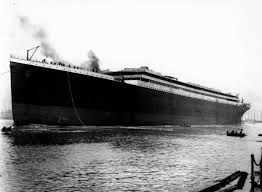
 
 ### Attribute information:
 
 1. PassengerId - An Id assigned to each passenger onboard, starting from 1
 2. Survived    - '0' or '1'. 1 denoting the passenger Survived, 0 didn't.
 3. Pclass      - '1', '2', or '3' denoting the Class in which passenger was travelling.
 4. Name        - Name of the passenger
 5. Sex         - 'male' or 'female'
 6. Age         - Cloumn telling the age of pasenger(in years).
 7. SibSp       - Number of siblings / spouses aboard the Titanic
 8. Parch       - Number of parents / children aboard the Titanic
 9. Ticket      - Ticket number
 10. Fare       - Passenger fare
 11. Cabin      - Cabin number
 12. Embarked   - Port of Embarkation { C = Cherbourg, Q = Queenstown, S = Southampton }

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
df = pd.read_csv('titanic_train.csv')

Let's view our imported dataset by using the head function which displays the first five rows of the dataframe.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Here is the size of the dataset.')
df.size

Here is the size of the dataset.


10692

In [5]:
print('Here is the shape of the dataset.')
df.shape

Here is the shape of the dataset.


(891, 12)

In [6]:
print('Checking the count of null values (if any) located in each column.')
df.isnull().sum()

Checking the count of null values (if any) located in each column.


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

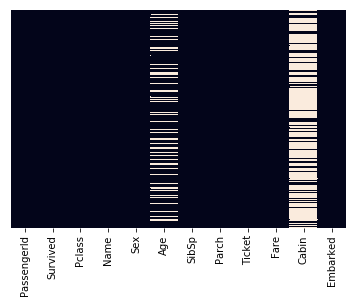

In [7]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

There we can see the distribution of Null Values throughout our dataset very clearly.

In [8]:
print('All unique Passenger Classes')
print(sorted(list(df['Pclass'].unique())))

All unique Passenger Classes
[1, 2, 3]


In [9]:
for i in range(1,4):
    print('Average Age of Pclass '+str(i)+': '+str(df[df['Pclass']==i]['Age'].mean()))

Average Age of Pclass 1: 38.233440860215055
Average Age of Pclass 2: 29.87763005780347
Average Age of Pclass 3: 25.14061971830986


We calculated average age of the passengers travelling in each passenger class.

Now we'll impute these average ages of each class as a replacement for null values present in Age column agaunst each passenger class.

In [10]:
def imputeAge(cols):
    Age = cols[0]
    Class = cols[1]
    if pd.isnull(Age):
        if Class == 1:
            return 38
        elif Class == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [11]:
df['Age'] = df[['Age', 'Pclass']].apply(imputeAge, axis=1)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see now, null-values of Age column have been handled, but we have Cabin information available for very few number of passengers as most of the entries in Cabin column are null-values, we gotta drop that column and drop 2 rows that have null-value for Embarked column as well.

In [13]:
df.drop('Cabin', axis=1, inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Preprocessing of data has been done , all null-values handled (dropped or imputed).

Now we take a look at the present shape of our DataFrame.

In [16]:
df.shape

(889, 11)

In [17]:
print('Statistical description of DataFrame')
df.describe()

Statistical description of DataFrame


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Below plotted is a countplot of the number of passengers whether they **Survived** or not.

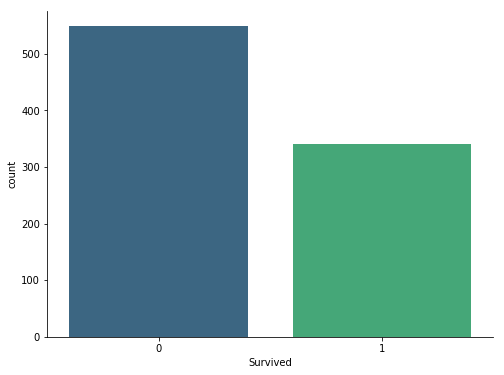

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(df['Survived'], palette='viridis')
sns.despine()

Majority of the passengers (approximately 62 % )that went on board the titanic, didn't survive the disaster and only around 38% were able to Survive.

Here's the countplot on the passengers travelling in each passenger class (**Pclass**):

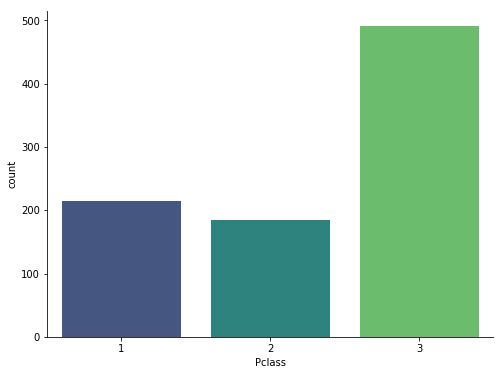

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df['Pclass'], palette='viridis')
sns.despine()

The countplot above tells us that the majority of the passengers were travelling in Passenger class 3 and comparatively less number of passengers were travelling via Class 1 and 2.

Here's the countplot of **Sex** of passeners in Titanic:

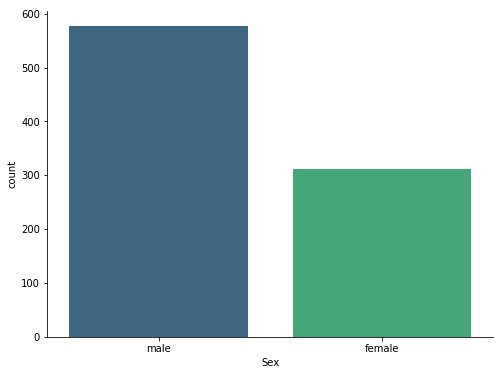

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(df['Sex'], palette='viridis')
sns.despine()

There were more number of male passengers on the Titanic as compared to female passengers.

Here's the countplot of ports where passengers **Embarked** in from:

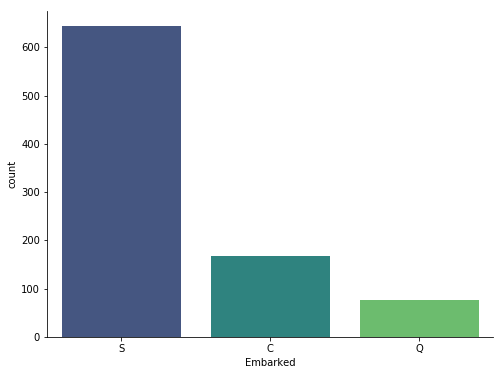

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(df['Embarked'], palette='viridis')
sns.despine()

Most of the passengers Embarked from the **Southampton**, a small number of passengers from **Cherbourg** and a few number of passengers from **Queenstown**

Below plotted is the countplot on Number of **SibSp** (siblings / spouses) aboard the Titanic

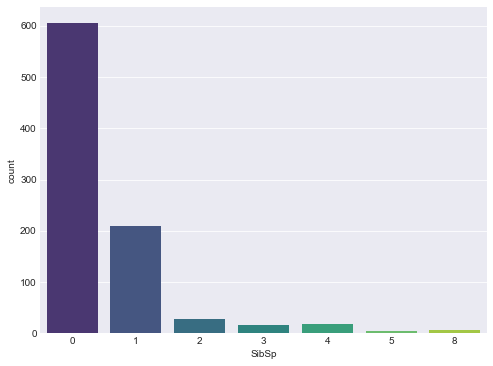

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(df['SibSp'], palette='viridis')
sns.despine()

Majority of the passengers were travelling alone without any siblings / spouses aboard the Titanic. A small numner of passengers had 1 siblings / spouses aboard the Titanic. The count is very less for 2, 3 4, 5, 8 number of siblings / spouses aboard the Titanic.

Below plotted is the countplot on Number of **Parch** (Parents / Children) aboard the Titanic

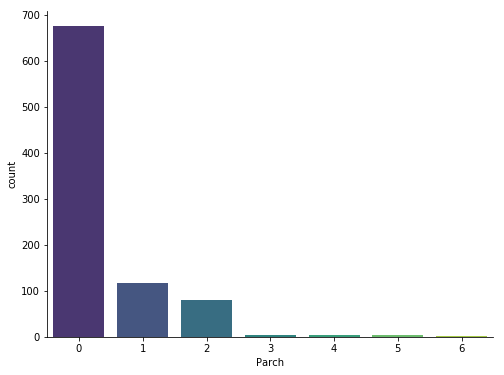

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(df['Parch'], palette='viridis')
sns.despine()

Most of the passengers that went on board the Titanic, were alone, i.e. not with their Parent/Children

Here's the distribution of **Age** of the passengers aboard the Titanic

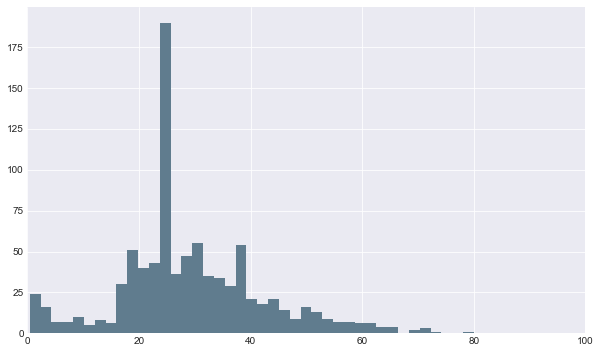

In [49]:
plt.figure(figsize=(10,6))
df['Age'].hist(bins=41, color='#607c8e')
plt.xlim(0,100)
sns.despine()

The above plot of Age of the passengers shows that majority of the passengers were of the age group 20-40 and amongst them passengers of age 22-23 were in the highest numbers.

Distribution of **Fare** paid by the passengers aboard the Tiatnic

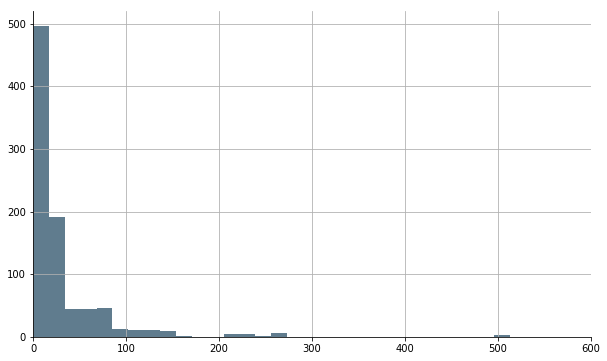

In [26]:
plt.figure(figsize=(10,6))
df['Fare'].hist(bins=30, color='#607c8e')
plt.xlim(0,600)
sns.despine()

- Most of the passengers didn't pay the Fare, i.e. were travelling for free.
- Some of the passengers paid lower fares.
- Only a few passengers paid Higher fares. They must be travelling via higher class.

## Bivariate Analysis

Countplot over number of passengers **Survived/Did not Survive**, splitted over **Sex**

<Figure size 720x432 with 0 Axes>

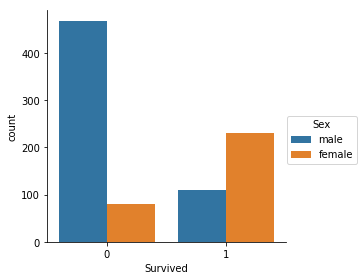

In [27]:
plt.figure(figsize=(10,6))
g = sns.factorplot('Survived', data=df, hue='Sex', kind='count')
g.set_xlabels('Survived')

- Female passengers were more likely to Survive than Male passengers.
- Among the passengers who didn't Survive there were more number of males.

Countplot over number of passengers **Survived/Did not Survive**, splitted over **Passenger Class**

<Figure size 720x432 with 0 Axes>

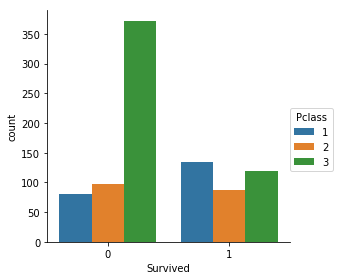

In [28]:
plt.figure(figsize=(10,6))
g = sns.factorplot('Survived', data=df, hue='Pclass', kind='count')
g.set_xlabels('Survived')

- Amongst the passengers travelling via upper classes more number of passengers Survived than didn't. Maybe beacuse they had paid extra fare than pssengers travelling in Lower classes, they had more options available for safety measures.
- In Lower Classes (2 and 3) , more number of passengers didn't Survive than did.

Countplot over number of passengers **Survived/Did not Survive**, splitted over the city they **Embarked** in from:

<Figure size 720x432 with 0 Axes>

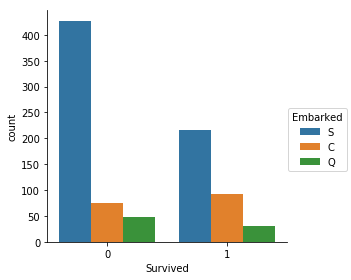

In [29]:
plt.figure(figsize=(10,6))
g = sns.factorplot('Survived', data=df, hue='Embarked', kind='count')
g.set_xlabels('Survived')

A possible inference from the above plot can be that passengers who Embarked in Southampton were less likely to Survive.

A swarmplot over passengers that **Survived/Did not Survive**, against the **Fare** they paid:

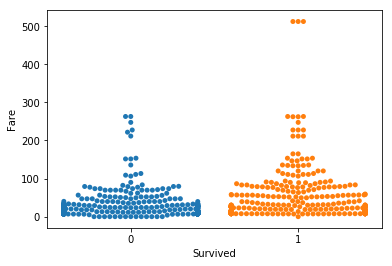

In [30]:
sns.swarmplot(x='Survived', y='Fare', data=df)

Amount of Fare definitely eems to be correlated with the Survival, which is Unsurprising as we know people from Higher classes( i.e paid higher fare) were more likely to Survive.

Countplot over number of passengers in each **Passenger Class**, splitted over **Sex**

<Figure size 720x432 with 0 Axes>

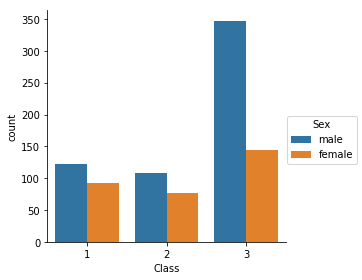

In [31]:
plt.figure(figsize=(10,6))
g = sns.factorplot('Pclass', data=df, hue='Sex', kind='count')
g.set_xlabels('Class')

Much can't be inferred from the above bivariate plot. Only a possible inference can be that in each class there were number of male passengers than female passengers, and also lower classes had more number of passengers than 1st class.

A distribution plot over **Age** of passengers grouped by **Pclass** (Passenger Class) they were travelling in:

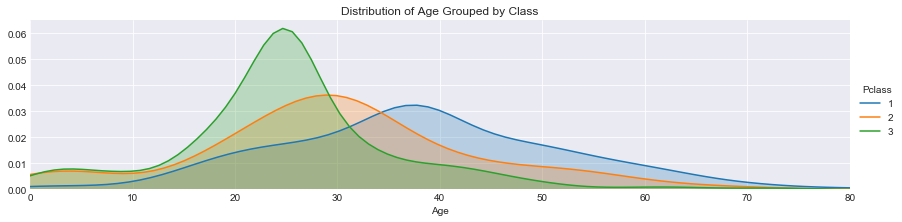

In [35]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

- Age of passengers travelling in 3rd Class has an almost normal distribution with a peak of young age people.
- While Age of passemgers travelling via 1st or 2nd class is a skewed distribution. It is skewed towards more aged people.
    Maybe because older people were those who had collected wealth enough in their life that they can travel via Higher class.

A distribution of **Age** of passengers grouped by **Survived** (whether they Survived or did not):

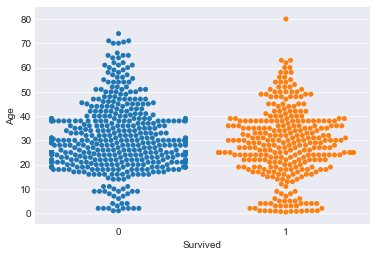

In [50]:
sns.swarmplot(x='Survived', y='Age', data=df)

A much more beautiful way to represent this plot is below:

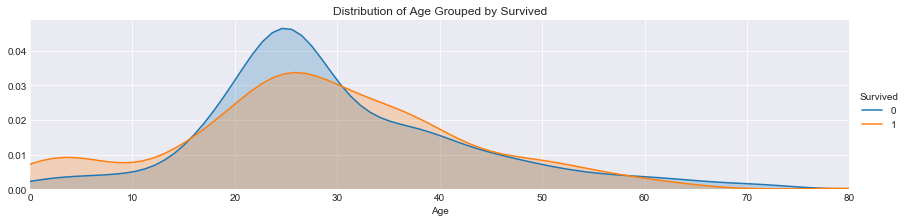

In [36]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(df, hue='Survived', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Survived')
fig.add_legend()

It can be inferred that younger passengers were more in number amongst survived passengers than older people.
Maybe because young ones are more active.

## Multivariate Analysis

A factorplot of people **Survived** over their **Pclass** (Passenger Class), splitted over **Sex**:

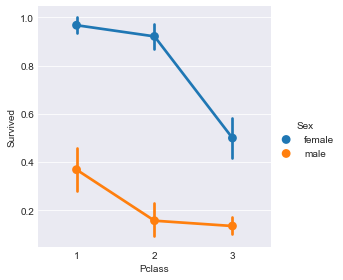

In [37]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df, order=range(1,4), 
               hue_order = ['female','male'])

As it is already clear to us from our bivariate plots also that passengers who were travelling in Higher classes and were female were more likely to Survive.

A mapping distribuion of **Age** of passengers with a FacetGrid with **Pclass** (Passenger class) as column and **Survived** (whether they Survived or not) as row:

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


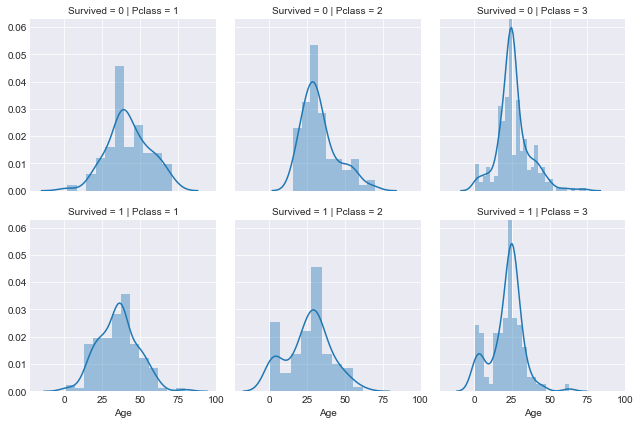

In [38]:
grid = sns.FacetGrid(df, col='Pclass', row='Survived')
grid.map(sns.distplot, 'Age')

- In each class the younger people were more likely to survive.
- And out of three Passenger classes, passengers of Higher classes were more likely to Survive
- Thus we can collectively say, passengers who traveeled in Higher classes or were young were more likely to survive.

A mapping distribuion of **Age** of passengers with a FacetGrid with **Sex** (male/female) as column and **Survived** (whether they Survived or not) as row:

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



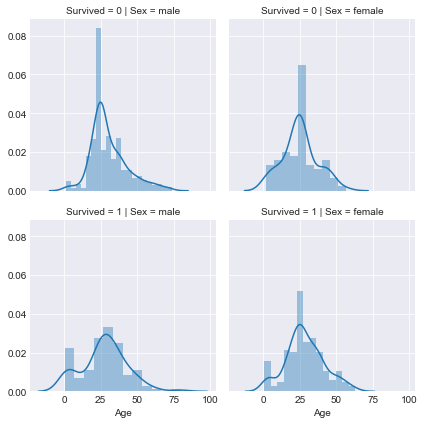

In [51]:
grid = sns.FacetGrid(df, col='Sex', row='Survived')
grid.map(sns.distplot, 'Age')

- In each gender group the younger people were more likely to survive.
- And female passengers were more likely to Survive
- Thus we can collectively say, female passengers who were young were more likely to survive.

A scatter plot of **Age** vs **Fare** splitted over **Survived**

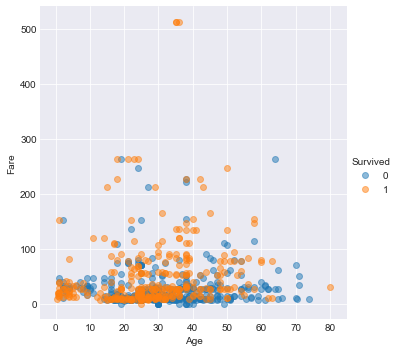

In [40]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df, fit_reg=False, scatter_kws={'alpha':0.5})

It is clear from the above multivariate plot that passengers who paid more fare or were young, were more likely to Survive than others.

# Summarization

So, we are at the end of our Exploratory Data Analysis of Titanic Data Set after going through a lot of graphs. Now we are keen to know the key factors that affected the Survival from the disaster.

First we went through univariate analysis and collected some interesting facts from there.

Then we went onto bivariate and multivariate analysis and inferred some very interesting relationships such as dependency of Age, Sex, Fare paid over Survival.


Below are the 3 plots that best sum up our Exploratory Data Analysis and features that are observed to affect most the Survival of passengers:

A factorplot of people **Survived** over their **Pclass** (Passenger Class), splitted over **Sex**:

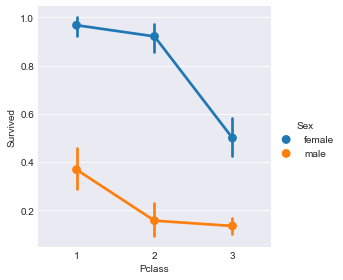

In [53]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df, order=range(1,4), 
               hue_order = ['female','male'])

A mapping distribuion of **Age** of passengers with a FacetGrid with **Sex** (male/female) as column and **Survived** (whether they Survived or not) as row:

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



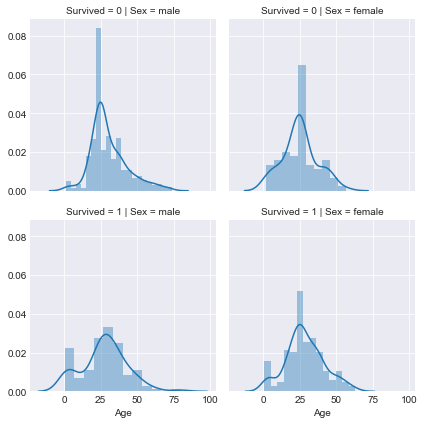

In [54]:
grid = sns.FacetGrid(df, col='Sex', row='Survived')
grid.map(sns.distplot, 'Age')

A scatter plot of **Age** vs **Fare** splitted over **Survived**

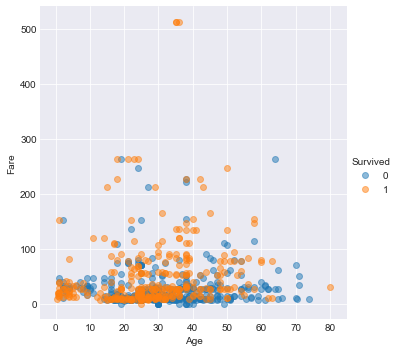

In [55]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df, fit_reg=False, scatter_kws={'alpha':0.5})


# CONCLUSION

Our analysis for the factors that contributed to the Survival of passengers from the Titanic disaster finally ends here. We've found that Fare paid greatly affected the Survival as we observed the passengers of Higher classes (who paid more fare) were more among Survived.

Sex is another important factor that also affected the Survival.

Another factor that affected the Survival was Age. There were more young passengers among Survived people.


*We concluded that The Young Female Passengers travelling via Higher Passenger Classes were more likely to Survive.*
